In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df=pd.read_csv('/content/mission_launches.csv')

In [ ]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
df.drop(['Unnamed: 0.1'],axis=1,inplace=True)

In [ ]:
df.head(5)

,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
df =df.rename(columns={'Unnamed: 0':'ID'})

In [ ]:
df.columns

Index(['ID', 'Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status',
       'Price', 'Mission_Status'],
      dtype='object')

In [ ]:
df.dtypes

,0
ID,int64
Organisation,object
Location,object
Date,object
Detail,object
Rocket_Status,object
Price,object
Mission_Status,object


In [ ]:
df.isnull().sum()

,0
ID,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,3360
Mission_Status,0


In [ ]:
df['Price']=pd.to_numeric(df['Price'], errors='coerce')

In [ ]:
df.head(5)

,ID,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              4324 non-null   int64  
 1   Organisation    4324 non-null   object 
 2   Location        4324 non-null   object 
 3   Date            4324 non-null   object 
 4   Detail          4324 non-null   object 
 5   Rocket_Status   4324 non-null   object 
 6   Price           949 non-null    float64
 7   Mission_Status  4324 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 270.4+ KB


In [ ]:
# df['Date1']=df['Date'].astype(str).str.replace('UTC','',regex=False).str.strip()

In [ ]:
def parse_dates(x):
    for fmt in ("%a %b %d, %Y %H:%M",   # Fri Aug 07, 2020 05:12
                "%a %b %d, %Y"):        # Thu Aug 29, 2019
        try:
            return pd.to_datetime(x, format=fmt)
        except ValueError:
            pass
    return pd.NaT

df["Date1"] = df["Date"].str.replace("UTC", "", regex=False).str.strip().apply(parse_dates)


In [ ]:
df.head(5)

,ID,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Date1
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020-08-07 05:12:00
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020-07-30 21:25:00
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020-07-30 11:50:00


In [ ]:
df[df['Date1'].isna()]

,ID,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Date1


In [ ]:
df.isnull().sum()

,0
ID,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,3375
Mission_Status,0
Date1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              4324 non-null   int64         
 1   Organisation    4324 non-null   object        
 2   Location        4324 non-null   object        
 3   Date            4324 non-null   object        
 4   Detail          4324 non-null   object        
 5   Rocket_Status   4324 non-null   object        
 6   Price           949 non-null    float64       
 7   Mission_Status  4324 non-null   object        
 8   Date1           4324 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 304.2+ KB


In [ ]:
df[df['Date1'].isna()]


,ID,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Date1


In [ ]:
df['Country'] = df['Location'].apply(lambda x: x.split(',')[-1].strip())


In [ ]:
df.head(5)

,ID,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Date1,Country
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020-08-07 05:12:00,USA
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00,China
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00,USA
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020-07-30 21:25:00,Kazakhstan
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020-07-30 11:50:00,USA


In [ ]:
df.isnull().sum()

,0
ID,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,3375
Mission_Status,0
Date1,0
Country,0


In [ ]:
df['Price']= df['Price'].fillna(df.groupby('Organisation')['Price'].transform('mean'))

In [ ]:
df['Price']=df['Price'].fillna(df['Price'].mean())


In [ ]:
df.isnull().sum()

,0
ID,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,0
Mission_Status,0
Date1,0
Country,0


In [ ]:
df


,ID,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Date1,Country
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.000000,Success,2020-08-07 05:12:00,USA
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.750000,Success,2020-08-06 04:01:00,China
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,54.989899,Success,2020-08-04 23:57:00,USA
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.000000,Success,2020-07-30 21:25:00,Kazakhstan
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.000000,Success,2020-07-30 11:50:00,USA
...,...,...,...,...,...,...,...,...,...,...
4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,122.080857,Failure,1958-02-05 07:33:00,USA
4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,122.080857,Success,1958-02-01 03:48:00,USA
4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,122.080857,Failure,1957-12-06 16:44:00,USA
4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,122.080857,Success,1957-11-03 02:30:00,Kazakhstan


In [ ]:
grp=df['Country'].value_counts().nlargest(10).reset_index()
grp.columns=['Country','Count']


**The bar chart shows how many space missions were launched by each country.
Countries with higher bars conducted more missions, highlighting their stronger space activity.**

In [ ]:
a=px.bar(grp,x='Country',y='Count',title='Country With Space Mission',color='Country')
a.show()


**The chart displays the number of active space missions for each country.
Countries with higher bars have more rockets currently in active status**

In [ ]:
from plotly.graph_objs import XAxis
actv_mission=df[df['Rocket_Status']=='StatusActive']
actv=actv_mission.groupby('Country',as_index=False)['Rocket_Status'].count().sort_values(by='Rocket_Status',ascending=False)
colors = [
    "#FF6F61",  # Coral
    "#6B5B95",  # Purple
    "#88B04B",  # Green
    "#F7CAC9",  # Pink
    "#92A8D1",  # Light Blue
    "#955251",  # Brown
    "#B565A7",  # Violet
    "#009B77",  # Teal
    "#DD4124",  # Red
    "#45B8AC"   # Aqua
]

b=px.bar(actv,x='Country',y='Rocket_Status',title='Active Space Missions',color='Country')
b.update_layout(yaxis_title='Active Status')
b.show()


**Graph using Seaborn**

/tmp/ipython-input-4218168642.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Successfull Launch')

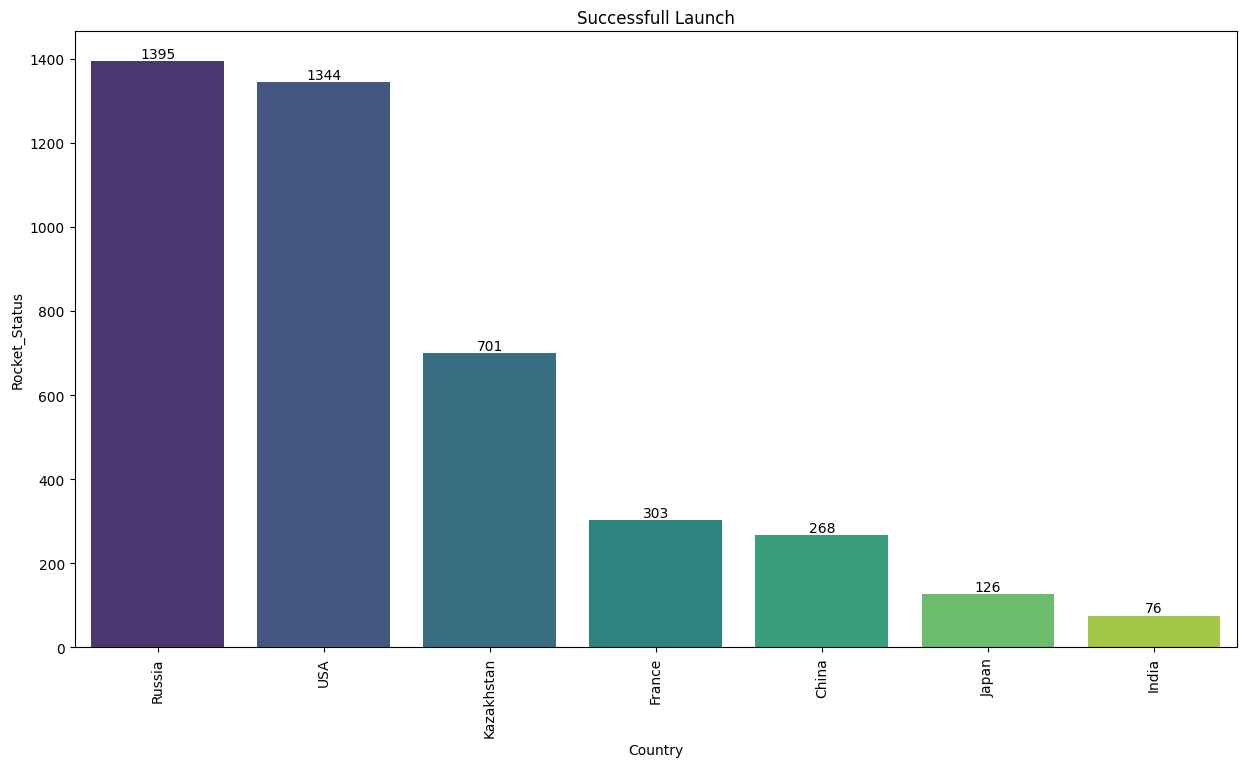

In [ ]:

actv1=df.groupby(df['Country'],as_index=False)['Rocket_Status'].count().sort_values(by='Rocket_Status',ascending=False).head(7)

plt.figure(figsize=(15,8))
c=sns.barplot(data=actv1,x='Country',y='Rocket_Status',palette='viridis')

for i in c.containers:
  c.bar_label(i)

plt.xticks(rotation=90)

plt.title('Successfull Launch')

**The pie chart shows the distribution of rocket launch statuses.
Each slice represents how many rockets fall into each status category.**

In [ ]:
status=df['Rocket_Status'].value_counts().reset_index()
status.columns=['Rocket_Status','Count']
c=px.pie(status,values='Count',names='Rocket_Status',title='Succesfull Rocket Launch')
c.show()

In [ ]:
df.head(2)

,ID,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Date1,Country
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020-08-07 05:12:00,USA
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00,China


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              4324 non-null   int64         
 1   Organisation    4324 non-null   object        
 2   Location        4324 non-null   object        
 3   Date            4324 non-null   object        
 4   Detail          4324 non-null   object        
 5   Rocket_Status   4324 non-null   object        
 6   Price           4324 non-null   float64       
 7   Mission_Status  4324 non-null   object        
 8   Date1           4324 non-null   datetime64[ns]
 9   Country         4324 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 337.9+ KB


In [ ]:
# df['Only Date'] =df['Date'].dt.date

In [ ]:
df.head(5)

,ID,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Date1,Country
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.000000,Success,2020-08-07 05:12:00,USA
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.750000,Success,2020-08-06 04:01:00,China
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,54.989899,Success,2020-08-04 23:57:00,USA
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.000000,Success,2020-07-30 21:25:00,Kazakhstan
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.000000,Success,2020-07-30 11:50:00,USA


**This code generates a bar chart displaying the count of successful rocket launches grouped by country and rocket status.The chart is displayed with customized size and labels to highlight the count of launches per country and status.**

In [ ]:
from numpy._core.defchararray import count
cstat=df.groupby(['Country','Rocket_Status']).size().reset_index(name='Count').sort_values(by='Count',ascending=False)

f=px.bar(cstat,x='Country',y='Count',color='Rocket_Status',title='Succesfull Rocket Launch',text='Count',text_auto=True)
f.update_layout(height=900, width=1200)
f.show()

**This graph shows top 10 organizations with the highest number of launch missions using value counts.**

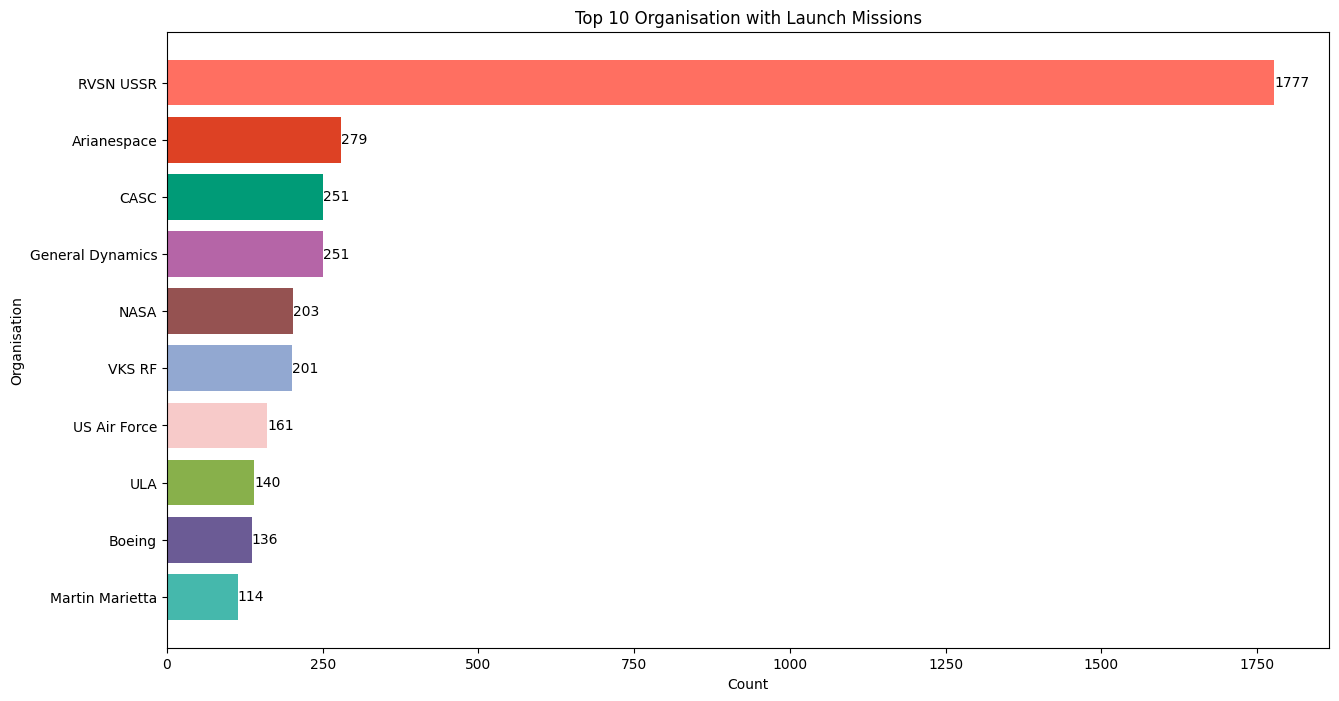

In [ ]:
colors = [
    "#45B8AC",  # Coral
    "#6B5B95",  # Purple
    "#88B04B",  # Green
    "#F7CAC9",  # Pink
    "#92A8D1",  # Light Blue
    "#955251",  # Brown
    "#B565A7",  # Violet
    "#009B77",  # Teal
    "#DD4124",  # Red
    "#FF6F61"   # Aqua
]

org=df['Organisation'].value_counts().nlargest(10).reset_index()
org.columns=['Organisation','Count']
org=org.sort_values(by='Count',ascending=True)
plt.figure(figsize=(15,8))
a=plt.barh(org['Organisation'],org['Count'],color=colors)
plt.bar_label(a)
plt.xlabel('Count')
plt.ylabel('Organisation')
plt.title('Top 10 Organisation with Launch Missions')
plt.show()
